# Constructing and Building Histograms

In [2]:
# histogram_introduction.py

## Histogram terminology

In [3]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[,accumulate]])

In [4]:
# Grayscale histograms without a mask
# grayscale_histogram.py

In [5]:
# Grayscale histograms with a mask
# grayscale_histogram_mask.py

In [6]:
# Color histograms
# color_histogram.py

In [7]:
# Custom visualizations of histograms
# histogram_custom_visualization.py

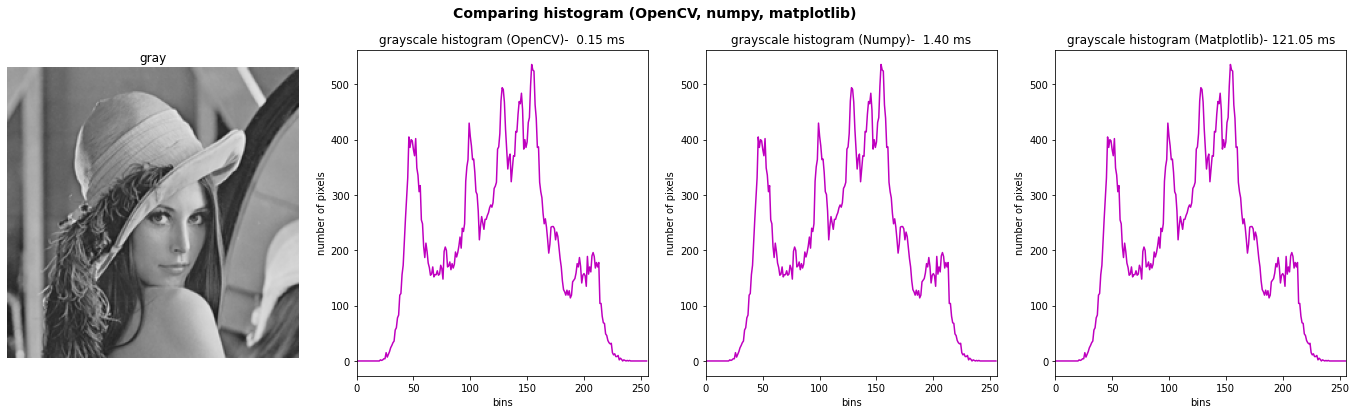

In [8]:
"""
Comparing how to create histograms using OpenCV, numpy and matplotlib
"""

# Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from timeit import default_timer as timer


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_with_matplotlib_gray(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(1, 4, pos)
    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)


# Create the dimensions of the figure and set title:
plt.figure(figsize=(24, 6))
plt.suptitle("Comparing histogram (OpenCV, numpy, matplotlib)", fontsize=14, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('lenna.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Take the execution time (execution_time = end - start) for cv2.calcHist():
start = timer()
# Calculate the histogram calling cv2.calcHist()
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
end = timer()
exec_time_calc_hist = (end - start) * 1000

# Take the execution time (execution_time = end - start) for np.histogram():
start = timer()
# Calculate the histogram calling np.histogram():
hist_np, bins_np = np.histogram(gray_image.ravel(), 256, [0, 256])
end = timer()
exec_time_np_hist = (end - start) * 1000

# Take the execution time (execution_time = end - start) for plt.hist():
start = timer()
# Calculate the histogram calling plt.hist():
(n, bins, patches) = plt.hist(gray_image.ravel(), 256, [0, 256])
end = timer()
exec_time_plt_hist = (end - start) * 1000

# Plot the grayscale image and the histogram:
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_hist_with_matplotlib_gray(hist, "grayscale histogram (OpenCV)-" + str('% 6.2f ms' % exec_time_calc_hist), 2, 'm')
show_hist_with_matplotlib_gray(hist_np, "grayscale histogram (Numpy)-" + str('% 6.2f ms' % exec_time_np_hist), 3, 'm')
show_hist_with_matplotlib_gray(n, "grayscale histogram (Matplotlib)-" + str('% 6.2f ms' % exec_time_plt_hist), 4, 'm')

# Show the Figure:
plt.show()

## Histogram equalization

In [1]:
# Grayscale histogram equalization

# normalizes the brightness and also increases the contrast of the image. 
# grayscale_histogram_equalization.py

# Color histogram equalization
# color_histogram_equalization.py
# cv2.split() and cv2.merge()

# commented that equalizing the three channels is not a good approach because the color shade changes dramatically. 
# This is due to the additive properties of the BGR color space. 
# As we are changing both the brightness and the contrast in the three channels independently, 
# this can lead to new color shades appearing in the image when merging the equalized channels. 

# color_histogram_equalization_hsv.py

## Contrast Limited Adaptive Histogram Equalization

In [2]:
# clahe_histogram_equalization.py

## Comparing CLAHE and histogram equalization

In [3]:
# comparing_hist_equalization_clahe.py

## Histogram comparison

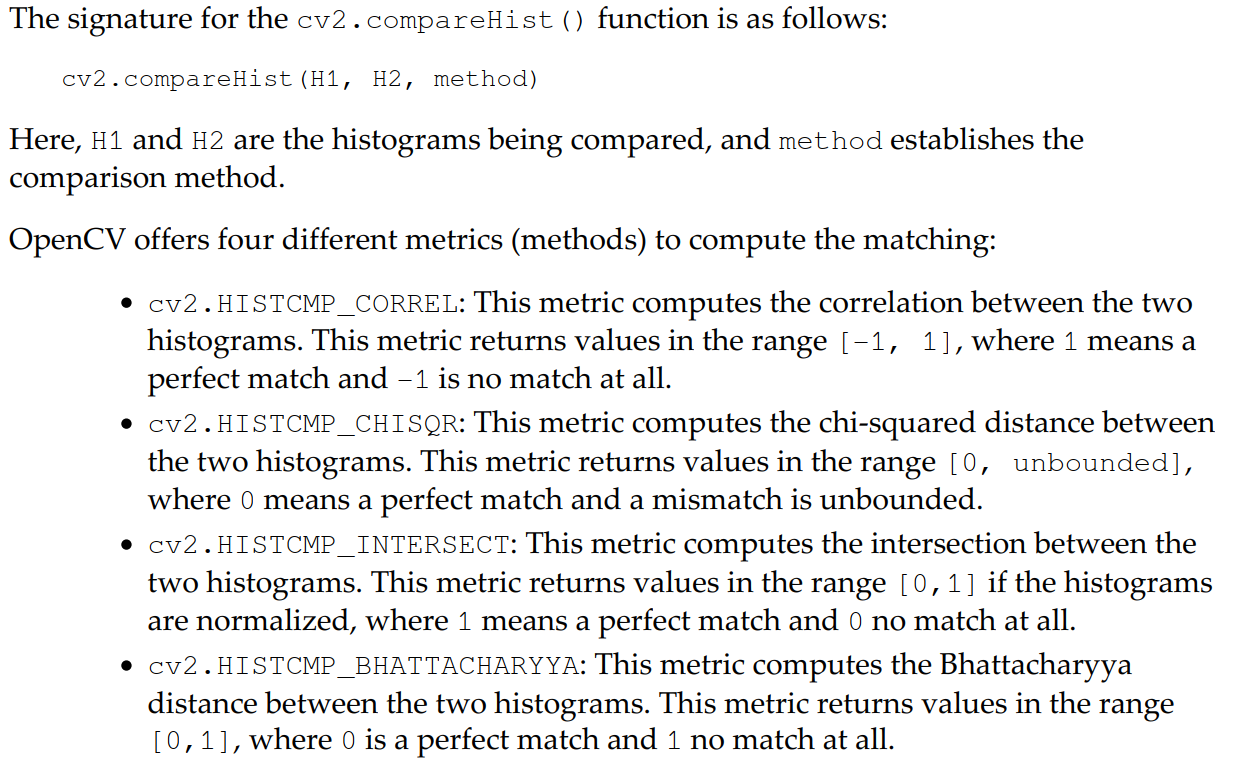

In [4]:
from IPython.display import Image, display
display(Image(filename="./comparison.png",embed=True))

In [5]:
# compare_histograms.py